# Prediction of House Prices
This notebook focuses on the prediction of house prices using regression models. The dataset used is the Boston Housing dataset, which contains information about various features of houses and their corresponding prices.


In [9]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers 

### We load the dataset
The notebook starts by loading the dataset using the boston_housing.load_data() function. The training data and labels are split into separate variables (train_data and train_labels), and the test data and labels are stored in test_data and test_labels.

In [10]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

We can see that we have 404 houses with 13 features

In [11]:
train_data.shape

(404, 13)

In [12]:
df_houses = pd.DataFrame(train_data)
df_houses

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


After observing the data, we noticed a significant variation in the ranges of certain features. Some features exhibited much larger values compared to others, which could potentially impact the performance of our models during training.

In [13]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data/std

test_data = test_data - mean
test_data = test_data/std

We create a function that is capable of delivering data models.
This function provides a convenient way to construct a regression model with a specified number of input features and learning rate. By adjusting the learning rate and modifying the architecture, this function can be used to experiment with different configurations and train regression models for various tasks.

In [14]:
def build_model_regression(lr_var, input_data):
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  
  model.compile(optimizer=optimizers.RMSprop(lr=lr_var), loss='mse', metrics =['mae']) 
  return model

In [15]:
k = 4 #iterations
num_val_samples = len(train_data) // k
num_epochs = 80
all_histories = []

We perform 4 iterations of training using a loop. Each iteration represents a fold in a cross-validation process. The data is split into training and validation sets, and a regression model is built and trained using the build_model_regression function. The validation mean absolute error (MAE) values are recorded for each iteration.

In [16]:
for i in range(4):
  print("Fold: ", i)
  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_labels[i*num_val_samples : (i+1)*num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]
       ], axis=0)

  partial_train_targets = np.concatenate(
      [train_labels[:i*num_val_samples],
       train_labels[(i+1)*num_val_samples:]
       ], axis=0)
  
  model = build_model_regression(0.001, 13)
  history = model.fit(partial_train_data, partial_train_targets,
                      epochs=num_epochs,
                      batch_size=16,
                      validation_data=(val_data, val_targets),
                      verbose=0)
  
  all_histories.append(history.history['val_mae'])

Fold:  0


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fold:  1
Fold:  2
Fold:  3


Now that we have trained our model we can do an analysis of the results

### Result analysis

We collected the output values from the 4 iterations of our neural network and calculated their average.

In [17]:
all_mea_avg = pd.DataFrame(all_histories).mean(axis=0)

In [18]:
all_mea_avg

0     19.049931
1     15.298092
2     10.821688
3      7.256926
4      5.471690
        ...    
75     2.446879
76     2.375133
77     2.383693
78     2.449433
79     2.340817
Length: 80, dtype: float64

After training, we analyze the results by calculating the average validation MAE values across the iterations. These average values are plotted to visualize the trend of error reduction during training.

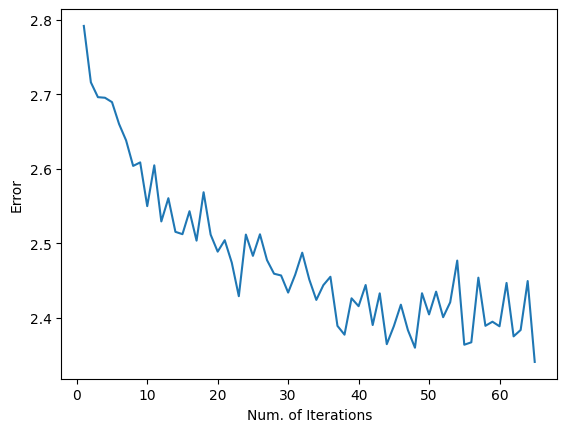

In [21]:
import matplotlib.pyplot as plt 

plt.plot(range(1,len(all_mea_avg[15:])+1), all_mea_avg[15:])
plt.xlabel('Num. of Iterations')
plt.ylabel('Error')
plt.show()

We can see that the error is minimal when we are between iteration 100 and 200, after that the model begins to increase the error.

When evaluating the model, we obtained an initial deviation of approximately 3.2513. However, we observed a significant improvement in performance after stopping the iterations between 100 and 200, resulting in a reduced deviation of 2.91250.

In [20]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 20.7015 - mae: 2.8148


[20.701465606689453, 2.8147575855255127]

## Conclusion
We demonstrate the process of building and training regression models for predicting house prices. We showcase data preprocessing, model construction, cross-validation, result analysis, and evaluation of the model's performance. The model achieves a reasonably low MAE, indicating its effectiveness in predicting house prices.